In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

import os
import unicodedata
import re
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.model_selection

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import prepare as prep
import explore as ex

In [2]:
#df = pd.read_csv('almost_there.csv', index_col=0)

In [3]:
#df = df.reset_index()

In [4]:
#df.nunique()

In [5]:
#df['title'].value_counts()

In [6]:
#df = df.drop_duplicates(subset='title')

In [7]:
#df

In [8]:
#df = df.drop(columns='book_tag')

In [9]:
#def get_data():
#    '''
#    Will pull the current data from the 'almost_there' csv file, and prep it for deeper cleaning.
#    '''
#    df = pd.read_csv('almost_there.csv', index_col=0)
#    df = df.drop_duplicates(subset='title')
    
#    save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']
#    sub = df[df['length'].isna()]
#    sub1 = sub[sub['title'].isin(save)]
#    df = df.dropna(subset='length')
#    df = pd.concat([df, sub1], axis=0)
    
#    df = df.dropna(subset='summary')
#    df = df.dropna(subset='year_published')
    
#    df = df.reset_index()
#    df = df.drop(columns=['index', 'book_tag'])
    
#    df['summary'] = df['summary'].astype('string')
#    df['title'] = df['title'].astype('string')
#    df['author'] = df['author'].astype('string')
#    df['genre'] = df['genre'].astype('string')
#    df['length'] = df['length'].astype('float')

#    return df

In [10]:
df = prep.get_data('all_books.csv')

In [11]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN
...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[]
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[]


In [12]:
df.isna().sum()

title                   0
summary                 0
year_published          0
author                  0
review_count            0
number_of_ratings       0
length                  4
genre                   0
rating                  0
reviews              2026
dtype: int64

In [13]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
dtype: object

In [14]:
#df = df.dropna(subset='summary')

In [15]:
#df[df['year_published'].isna()]

In [16]:
#df = df.dropna(subset='year_published')

In [17]:
prep.clean_article(df, 'title')

In [18]:
prep.clean_article(df, 'summary')

In [19]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
dtype: object

In [20]:
#df = df.drop(columns='clean_titles')

In [21]:
df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)

In [22]:
prep.clean_article(df1, 'Book')

In [23]:
ser = df1['cleaned_Book']

In [24]:
prep.creat_tar(df, ser)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller


In [25]:
#save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']

In [26]:
#sub = df[df['length'].isna()]

In [27]:
#sub1 = sub[sub['title'].isin(save)]

In [28]:
#df = df.dropna(subset='length')

In [29]:
#df = pd.concat([df, sub1], axis=0)

In [30]:
df.dtypes

title                 string
summary               string
year_published        object
author                string
review_count           int64
number_of_ratings      int64
length               float64
genre                 string
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
target                object
dtype: object

In [31]:
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)

In [32]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...


In [33]:
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)

In [34]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404


In [35]:
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

In [36]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655,very positive
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


In [37]:
ham_counts = pd.Series(ham_words).value_counts()


NameError: name 'ham_words' is not defined

In [ ]:
spam_counts.head()

In [ ]:
word_freq = pd.concat([ham_counts, spam_counts, all_counts], axis=1)


In [ ]:
word_freq.isna().sum()

In [ ]:
word_freq.columns = ['ham', 'spam', 'all']
word_freq.fillna(0, inplace=True)
word_freq.head()

In [ ]:
word_freq.sort_values('all', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
word_freq['pct_spam'] = word_freq['spam'] / word_freq['all'] * 100
word_freq[word_freq['ham'] > 200].sort_values('pct_ham', ascending=False)

In [ ]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))
top_ham_bigrams = ham_bigrams.value_counts().head(10)


In [ ]:
#Plot
top_ham_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring ham bigrams')
plt.show()

# exploration

In [66]:
#def prep_data(filename):
    
#    df = prep.get_data(filename)
    
#    prep.clean_article(df, 'title')
#    prep.clean_article(df, 'summary')
    
#    df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)
#    prep.clean_article(df1, 'Book')
#    ser = df1['cleaned_Book']
    
#    prep.creat_tar(df, ser)
    
#    df.loc[[3806], ['length']] = 320
#    df.loc[[3807], ['length']] = 407
#    df.loc[[3808], ['length']] = 368
#    df.loc[[3809], ['length']] = 920
    
#    df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)
#    df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)
#    df['sentiment'] = df['compound'].apply(prep.get_sentiment)
    
#    return df
    

In [2]:
df = prep.prep_data('all_books.csv')

In [3]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655,very positive
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,320.0,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,bestseller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,407.0,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,bestseller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,368.0,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,bestseller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


In [111]:
# genre_counts = df['genre'].value_counts()

In [4]:
# df['genre'].value_counts()

Fiction               617
Nonfiction            521
Fantasy               463
Romance               311
Mystery               265
Young Adult           263
Historical Fiction    235
Science Fiction       103
History               100
Horror                 72
Thriller               55
Classics               51
Urban Fantasy          50
Business               47
Memoir                 36
Graphic Novels         34
Christian              32
Poetry                 32
Psychology             31
Science                31
Short Stories          31
Travel                 24
Historical Romance     23
Picture Books          21
Childrens              20
Humor                  20
Self Help              19
Philosophy             18
Vampires               18
Chick Lit              18
Biography              18
Paranormal             17
Music                  16
Comics                 15
Film                   10
Plays                   8
Name: genre, dtype: Int64

In [112]:
# genre_counts

Fiction              617
Nonfiction           521
Fantasy              463
Romance              311
Mystery              265
                    ... 
Puzzles                1
Superheroes            1
Menage                 1
Cyberpunk              1
Realistic Fiction      1
Name: genre, Length: 112, dtype: Int64

In [115]:
# df['target'].value_counts()

unsuccessful    3485
best seller      160
Name: target, dtype: int64

In [114]:
# genres_to_remove = genre_counts[genre_counts < 8].index
# remove the rows with those genres "filtering"
# df = df[~df['genre'].isin(genres_to_remove)]

In [59]:
#df.loc[[3806], ['length']] = 320

In [61]:
#df.loc[[3807], ['length']] = 407

In [62]:
#df.loc[[3808], ['length']] = 368

In [63]:
#df.loc[[3809], ['length']] = 920

In [4]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful,moral air pierre learn care young pierre whose...,0.000,0.712,0.288,0.8655,very positive
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,320.0,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,407.0,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller,two lonely town colorado hope despair twelve m...,0.154,0.720,0.125,-0.6858,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,368.0,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


In [68]:
df.isna().sum()

title                    0
summary                  0
year_published           0
author                   0
review_count             0
number_of_ratings        0
length                   0
genre                    0
rating                   0
reviews               2026
cleaned_title            0
cleaned_summary          0
target                   0
lemmatized_summary       0
neg                      0
neutral                  0
pos                      0
compound                 0
sentiment                0
dtype: int64

In [11]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['target'])
    return train, test

In [12]:
train, test = split(df)

In [13]:
train

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive
2437,The Past,The Past is the first book in the VanWest seri...,2020,Kenneth Thomas,211,690,195.0,Science Fiction,3.77,NaN,the past,the past is the first book in the vanwest seri...,unsuccessful,past first vanwest series enforcer live dystop...,0.076,0.881,0.044,-0.2796,negative
2551,The Soloist,"Now a major motion picture-""An intimate por...",2008,Steve López,1544,9944,289.0,Nonfiction,3.91,NaN,the soloist,\n\n now a major motion picturean intimate por...,unsuccessful,major motion picturean intimate portrait menta...,0.123,0.794,0.083,-0.4576,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Oblivion,"In the stories that make up Oblivion, David Fo...",2004,David Foster Wallace,1044,13871,329.0,Short Stories,4.07,NaN,oblivion,"in the stories that make up oblivion, david fo...",unsuccessful,story make oblivion david foster wallace join ...,0.098,0.825,0.077,-0.6720,very negative
1164,It's in His Kiss: The 2nd Epilogue,"What happened to the diamonds?If you've read ""...",2006,Julia Quinn,367,9880,38.0,Romance,3.98,[],it's in his kiss the 2nd epilogue,what happened to the diamondsif you've read it...,unsuccessful,happen diamondsif read kiss want know miss cha...,0.000,0.587,0.413,0.9871,very positive
2958,You,When a beautiful aspiring writer strides into ...,2014,Caroline Kepnes,23544,219200,464.0,Thriller,3.95,NaN,you,when a beautiful aspiring writer strides into ...,unsuccessful,beautiful aspire writer stride east village bo...,0.066,0.801,0.133,0.9186,very positive
222,America America,"A stunning novel, set in a small town during t...",2008,Ethan Canin,610,3520,458.0,Fiction,3.67,NaN,america america,"a stunning novel, set in a small town during t...",unsuccessful,stun set small town nixon era today america fa...,0.069,0.686,0.245,0.9874,very positive


In [ ]:
train

In [19]:
var1 = train[train['target'] == 'best seller']

var2 = train[train['target'] == 'unsuccessful']

var1.shape, var2.shape

((129, 19), (2919, 19))

In [26]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

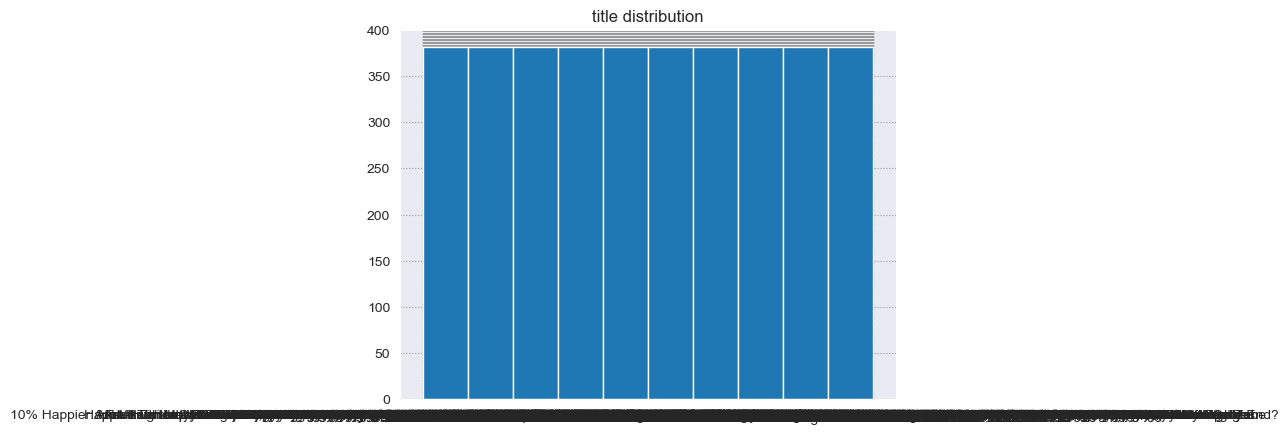

/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12519 (\N{KATAKANA LETTER SMALL YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PRO

ValueError: 
The "Mightiest" of Earth's Mightiest Heroes is back! Ace pilot. Legendary Avenger. One hundred percent pure bad-@$$. Carol Danvers has a new name, a new mission - and all the power she needs to make her own life a living hell. As the new Captain Marvel, Carol is forging from a challenge from her past! It's a firefight in the sky as the Banshee Squadron debut - but who are the Prowlers, and where has Carol seen them before? And how does secret NASA training program Mercury 13 fit in? Witness Captain Marvel in blazing battlefield action that just may change the course of history! Avengers Time Travel Protocols: engage! Collecting: Captain Marvel 1-6
                                                                                                                 ^
Expected end of text, found '$'  (at char 113), (line:1, col:114)

<Figure size 640x480 with 1 Axes>

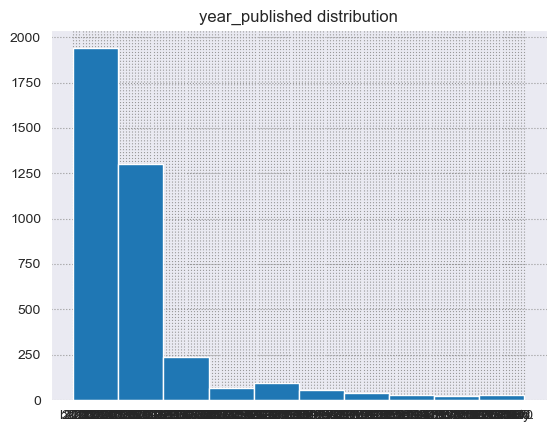

In [ ]:
for col in train.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [99]:
genre_counts = df['genre'].value_counts()

In [101]:
genres_to_remove = genre_counts[genre_counts < 8].index
# remove the rows with those genres "filtering"
df = df[~df['genre'].isin(genres_to_remove)]

In [102]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful,year scientific technological advance open gat...,0.104,0.846,0.051,-0.7935,very negative
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful,cuatro profesores de literatura pelletier mori...,0.023,0.962,0.015,-0.3182,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,The Invention of Morel,Jorge Luis Borges declared The Invention of Mo...,1940,Adolfo Bioy Casares,2100,22050,103.0,Fiction,4.03,[],the invention of morel,jorge luis borges declared the invention of mo...,unsuccessful,jorge luis borges declare invention morel mast...,0.010,0.813,0.177,0.9738,very positive
3802,Huế 1968: A Turning Point of the American War ...,"In the early hours of January 31, 1968, the No...",2017,Mark Bowden,729,6428,610.0,History,4.32,[],hue 1968 a turning point of the american war i...,"in the early hours of january 31, 1968, the no...",unsuccessful,early hour january north vietnamese launch one...,0.175,0.777,0.048,-0.9851,very negative
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,320.0,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller,stephanie plum think career fugitive apprehens...,0.187,0.756,0.057,-0.9878,very negative
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,368.0,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller,gideon cross beautiful flawless outside damage...,0.174,0.653,0.173,0.4404,positive


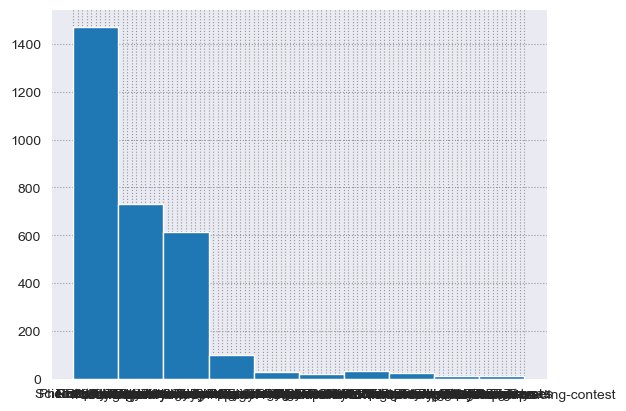

In [29]:
plt.hist(x='genre', data=train)
plt.show()